# Modelos de Ensamble para Regresión

Para este ejercicio volveremos a usar el código usado en la clase 9

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/1.png?raw=true'>

Vamos a trabajar con el conjunto de datos **"Costos Medicos"**.

El objetivo de este proyecto es crear un modelo que pueda **predecir cuánto debería cobrar una compañía de seguros a un cliente por una póliza**, dado sus factores de riesgo (si la persona es fumadora, región donde está, edad, número de hijos, etc.)

Este problema puede resolverse construyendo un **modelo de regresión** que tome como entrada variables como edad, sexo, BMI (Índice de Masa Corporal), fumador y región, y prediga el costo médico como salida.

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/2.pmg.png?raw=true'>

# Obtener datos

Se pueden leer directamente de [este](https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv) enlace o descargaarlos al computador.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.columns = ["edad", "sexo", "imc", "niños", "fumador", "región", "costos (dólares)"]

In [ ]:
df.head()

,edad,sexo,imc,niños,fumador,región,costos (dólares)
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Análisis Exploratorio de Datos

El objetivo de hacer Análisis Exploratorio de Datos (EDA) en un modelo de machine learning es comprender mejor los datos antes de aplicar cualquier modelo. Es una etapa crítica que te permite identificar patrones, detectar errores, y formular hipótesis sobre las relaciones entre las variables, todo lo cual ayuda a preparar los datos adecuadamente para el modelado.

In [ ]:
print("\nNúmero de filas y columnas del dataset:")
print(df.shape)


Número de filas y columnas del dataset:
(1338, 7)


In [ ]:
print("\nResumen de la información del dataset:")
print(df.info())


Resumen de la información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              1338 non-null   int64  
 1   sexo              1338 non-null   object 
 2   imc               1338 non-null   float64
 3   niños             1338 non-null   int64  
 4   fumador           1338 non-null   object 
 5   región            1338 non-null   object 
 6   costos (dólares)  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
# Contar valores faltantes
print(df.isnull().sum())

edad                0
sexo                0
imc                 0
niños               0
fumador             0
región              0
costos (dólares)    0
dtype: int64


In [ ]:
print("\nEstadísticas descriptivas de las variables numéricas:")
df.describe()


Estadísticas descriptivas de las variables numéricas:


,edad,imc,niños,costos (dólares)
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
print("\nEstadísticas descriptivas de las variables categóricas:")
df.describe(include=['object', 'category'])


Estadísticas descriptivas de las variables categóricas:


,sexo,fumador,región
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


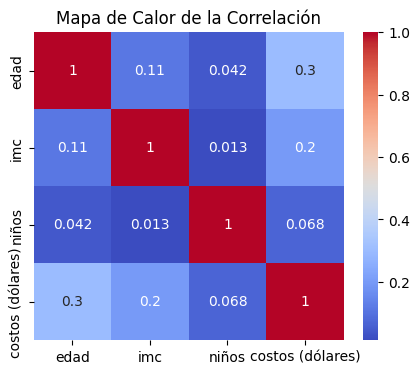

In [ ]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Crear el mapa de calor con las columnas numéricas
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Correlación')
plt.show()

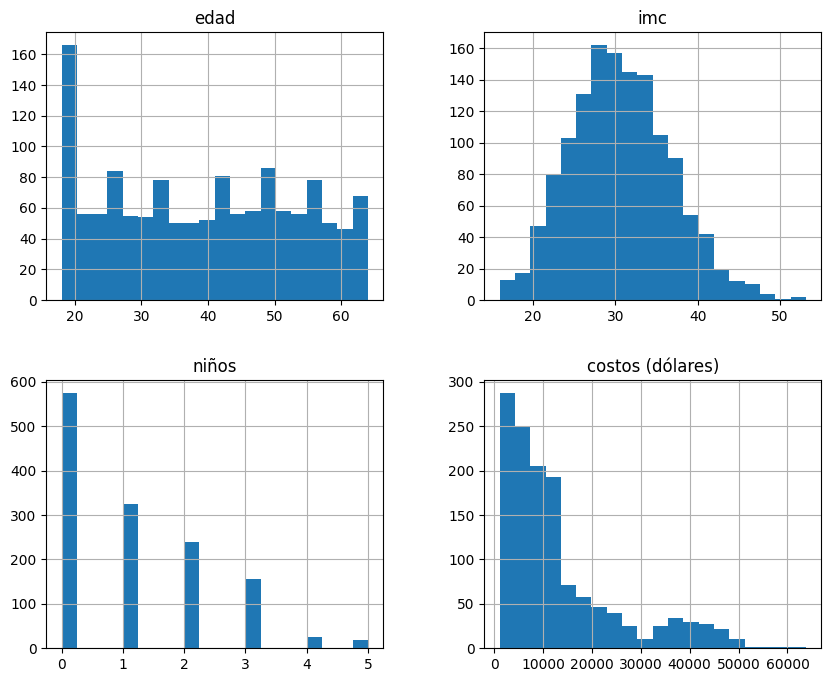

In [ ]:
# Crear histogramas para variables numéricas
df[['edad', 'imc', 'niños', 'costos (dólares)']].hist(bins=20, figsize=(10, 8))
plt.show()

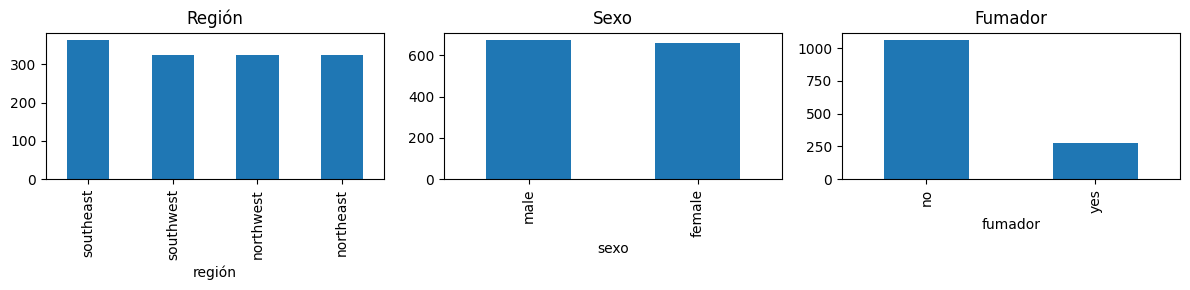

In [ ]:
# Crear una figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(12, 3))  # 1 fila, 3 columnas

df['región'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Región')

df['sexo'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Sexo')

df['fumador'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Fumador')

plt.tight_layout()
plt.show()

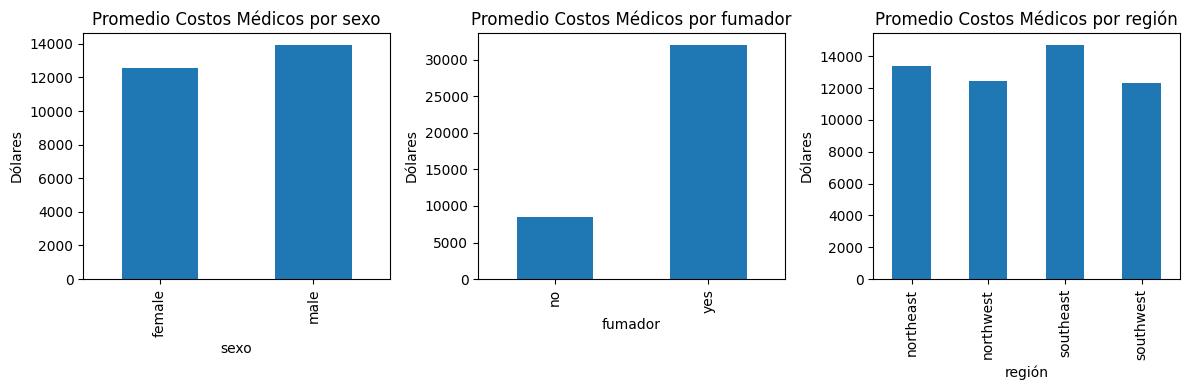

In [ ]:
# Variables categoricas
categorical_columns = ['sexo', 'fumador', 'región']

# Crear una figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila, 3 columnas

# Iterar sobre cada columna categórica y generar el gráfico en cada subplot
for i, column in enumerate(categorical_columns):
    mean_costs = df.groupby(column)['costos (dólares)'].mean()
    mean_costs.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Promedio Costos Médicos por {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Dólares')

plt.tight_layout()
plt.show()

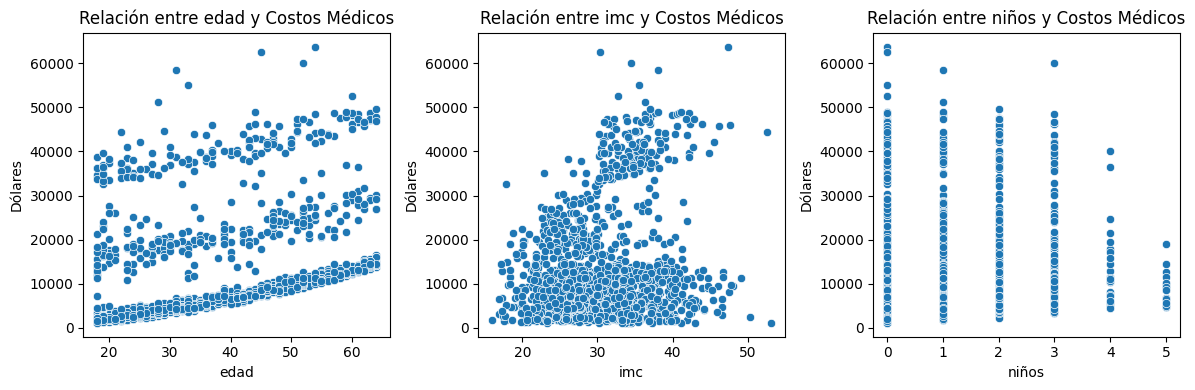

In [ ]:
# Variables numéricas
numerical_columns = ['edad', 'imc', 'niños']

# Crear una figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila, 3 columnas

# Iterar sobre cada columna numérica y generar el gráfico en cada subplot
for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=df[column], y=df['costos (dólares)'], ax=axes[i])
    axes[i].set_title(f'Relación entre {column} y Costos Médicos')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Dólares')

plt.tight_layout()
plt.show()

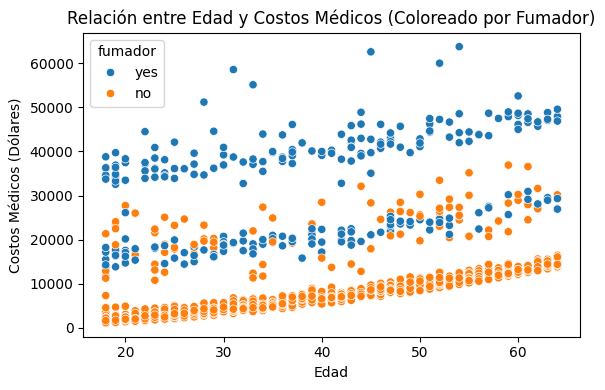

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['edad'], y=df['costos (dólares)'], hue=df['fumador'])

plt.title('Relación entre Edad y Costos Médicos (Coloreado por Fumador)')
plt.xlabel('Edad')
plt.ylabel('Costos Médicos (Dólares)')

plt.tight_layout()
plt.show()

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/3.png?raw=true'>

# ⚠️ Dividir datos en entrenamiento (train) y prueba (test) ⚠️

Es **crucial** dividir los datos en conjuntos de entrenamiento y prueba **ANTES** de realizar cualquier ingeniería de características o entrenar el modelo.

Si transformas los datos antes de hacer la división, puedes permitir que información del conjunto de prueba se mezcle con los datos de entrenamiento. Esto provoca un sobreajuste, donde el modelo parece funcionar muy bien, pero en realidad no refleja su rendimiento en datos nuevos o desconocidos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['costos (dólares)'])  # Aquí estamos eliminando la columna 'costos (dólares)', que es el objetivo
y = df['costos (dólares)']  # Esta es nuestra variable objetivo

In [ ]:
# Dividir el conjunto de datos en entrenamiento (train) y prueba (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Ver el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}. Tamaño de las etiquetas de entrenamiento: {y_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}. Tamaño de las etiquetas de prueba: {y_test.shape}")

Tamaño del conjunto de entrenamiento: (1070, 6). Tamaño de las etiquetas de entrenamiento: (1070,)
Tamaño del conjunto de prueba: (268, 6). Tamaño de las etiquetas de prueba: (268,)


# Ingeniería de características

- La ingeniería de características es el proceso de convertir los datos en bruto en características o variables que un modelo de Machine Learning pueda utilizar eficazmente para hacer predicciones.

- Estas características son los valores que el modelo usa como entradas, por lo que crear características de calidad puede mejorar considerablemente el rendimiento del modelo.

  - Para las **características categóricas**, es **obligatorio** transformarlas antes de usarlas en el modelo. Esto se debe a que los modelos de Machine Learning no pueden trabajar con texto o categorías directamente, por lo que es necesario convertirlas a una forma numérica (como con one-hot encoding o codificación ordinal).

  - Para las **características numéricas**, la transformación no es obligatoria, pero es recomendable. Normalizar o estandarizar las características numéricas puede mejorar la precisión y estabilidad del modelo, especialmente cuando las variables tienen magnitudes de valores muy diferentes.

In [ ]:
# Define cuáles columnas son categoricas y cuáles son numéricas
categorical_columns = ['sexo', 'fumador', 'región']
numerical_columns = ['edad', 'imc', 'niños']

In [ ]:
# Crea un preprocesador que aplique tanto one-hot encoding para las variables categóricas como escalado para las variables numéricas.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Estandarizar características numéricas
        ('cat', OneHotEncoder(), categorical_columns)  # Codificación one-hot para las características categóricas
    ])

- Usamos `fit_transform` ÚNICAMENTE en X_train para **aprender** los parámetros de la transformación.

- Usamos **solo** `transform` en X_test para **aplicar** esas mismas transformaciones, sin recalcular los parámetros, garantizando que no haya fuga de datos y que el modelo **generalice** correctamente.

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Los nombres de las columnas numéricas columnas no cambian después de la transformación
nombres_columnas_numericas = numerical_columns  # ['edad', 'imc', 'niños']

# El método get_feature_names_out genera los nombres de las nuevas columnas creadas por OneHotEncoder para las columnas categóricas
nombres_columnas_categoricas = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combinar los nombres de las columnas numéricas y categóricas en una lista
nombres_todas_las_columnas = list(nombres_columnas_numericas) + list(nombres_columnas_categoricas)

# Convertir la matriz en un DataFrame con los nombres de las columnas
X_train_processed_df = pd.DataFrame(X_train_processed, columns=nombres_todas_las_columnas)

X_train_processed_df.head()

,edad,imc,niños,sexo_female,sexo_male,fumador_no,fumador_yes,región_northeast,región_northwest,región_southeast,región_southwest
0,0.201432,-0.992067,0.775177,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.688351,0.028751,-0.890364,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.497904,0.119381,-0.890364,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.759157,-0.976413,-0.057593,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.405128,-0.515026,-0.890364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Convertir la matriz en un DataFrame con los nombres de las columnas
X_test_processed_df = pd.DataFrame(X_test_processed, columns=nombres_todas_las_columnas)

X_test_processed_df.head()

,edad,imc,niños,sexo_female,sexo_male,fumador_no,fumador_yes,región_northeast,región_northwest,región_southeast,región_southwest
0,-0.365013,0.667278,-0.890364,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.626266,-0.432636,-0.057593,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.343043,-1.095056,0.775177,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.413849,-0.021507,-0.057593,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.789847,1.152558,-0.057593,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/4.png?raw=true'>

# Modelaje de Supervisión: Regresión

En machine learning, es común entrenar varios modelos que sean apropiados para la tarea en cuestión (en este caso, regresión) y luego elegir el mejor modelo basado en su rendimiento. En este paso se pueden entrenar tantos **modelos simples** como **modelos de ensamble**.

En este ejemplo vamos a entrenar los siguientes modelos:
- Regresión Lineal
- Árbol de Decisión
- Random Forest (Ensamble)
- Gradient Boosting (Ensamble)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Entrenamos la regresión lineal
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X_train_processed_df, y_train)

LinearRegression()

In [ ]:
# Entrenamos el árbol de decisión
modelo_arbol_decision = DecisionTreeRegressor()
modelo_arbol_decision.fit(X_train_processed_df, y_train)

DecisionTreeRegressor()

In [ ]:
# Entrenamos el Random Forest
modelo_random_forest = RandomForestRegressor()
modelo_random_forest.fit(X_train_processed_df, y_train)

RandomForestRegressor()

In [ ]:
# Entrenamos el Gradient Boosting
modelo_gradient_boosting = GradientBoostingRegressor()
modelo_gradient_boosting.fit(X_train_processed_df, y_train)

GradientBoostingRegressor()

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/5.png?raw=true'>

# Evaluación del modelo

Para evaluar el rendimiento del modelo, primero necesitamos usarlo para hacer **predicciones** en el conjunto de datos de prueba. Luego, compararemos estas predicciones con los valores reales de nuestro conjunto de prueba para medir qué tan bien está funcionando el modelo. Esto nos dará una idea clara de su capacidad para **generalizar** a nuevos datos.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Definimos una función para calcular RMSE y R²
def calcular_metricas(modelo, X_test, y_test):
    predicciones = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predicciones))
    r2 = r2_score(y_test, predicciones)
    return rmse, r2

In [ ]:
# Calculamos las métricas para cada modelo
rmse_regresion_lineal, r2_regresion_lineal = calcular_metricas(modelo_regresion_lineal, X_test_processed_df, y_test)
rmse_arbol_decision, r2_arbol_decision = calcular_metricas(modelo_arbol_decision, X_test_processed_df, y_test)
rmse_random_forest, r2_random_forest = calcular_metricas(modelo_random_forest, X_test_processed_df, y_test)
rmse_gradient_boosting, r2_gradient_boosting = calcular_metricas(modelo_gradient_boosting, X_test_processed_df, y_test)

In [ ]:
# Creamos un DataFrame con los resultados
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_regresion_lineal, rmse_arbol_decision, rmse_random_forest, rmse_gradient_boosting],
    'R2': [r2_regresion_lineal, r2_arbol_decision, r2_random_forest, r2_gradient_boosting]
})

resultados.sort_values(['RMSE', 'R2'], ascending=[True, False]).round(2)

,Modelo,RMSE,R2
3,Gradient Boosting,5112.96,0.81
2,Random Forest,5129.52,0.81
0,Regresión Lineal,6413.88,0.70
1,Árbol de Decisión,7534.94,0.59


## Escoger el mejor modelo usando las métricas de rendimiento

En este caso, el **Gradient Boosting** es la mejor opción, ya que tiene el $RMSE$ más bajo y el $R²$ más alto, lo que indica que es el modelo que mejor predice los costos médicos de este conjunto de datos.

### RMSE (Raíz del Error Cuadrático Medio)
- El RMSE mide el promedio de la diferencia entre los valores predichos y los valores reales. Un valor más bajo de RMSE indica que el modelo tiene menos errores de predicción en promedio.
- El Gradient Boosting tiene un RMSE de 4265.33, lo que significa que, en promedio, las predicciones del modelo tienen un error de aproximadamente $4265.33 dólares.

### R² (Coeficiente de Determinación)
- El R² Score mide qué porcentaje de la variabilidad de los datos es explicada por el modelo. Un valor de R² cercano a 1 indica que el modelo es capaz de explicar la mayor parte de la variabilidad en los costos médicos.
- El Gradient Boosting tiene un R² de 0.89, lo que indica que el modelo puede explicar el 89% de la variabilidad en los costos médicos. En términos prácticos, quiere decir que el modelo captura bastante bien las relaciones entre las características (edad, IMC, niños, fumador, etc.) y los costos médicos.

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/6.png?raw=true'>

# Interpretando el modelo

A diferencia de la regresión lineal, los modelos basados en árboles no tienen coeficientes para interpretar. En su lugar, se puede ver la imporancia de sus características para poder hacer recomendaciones de negocios.

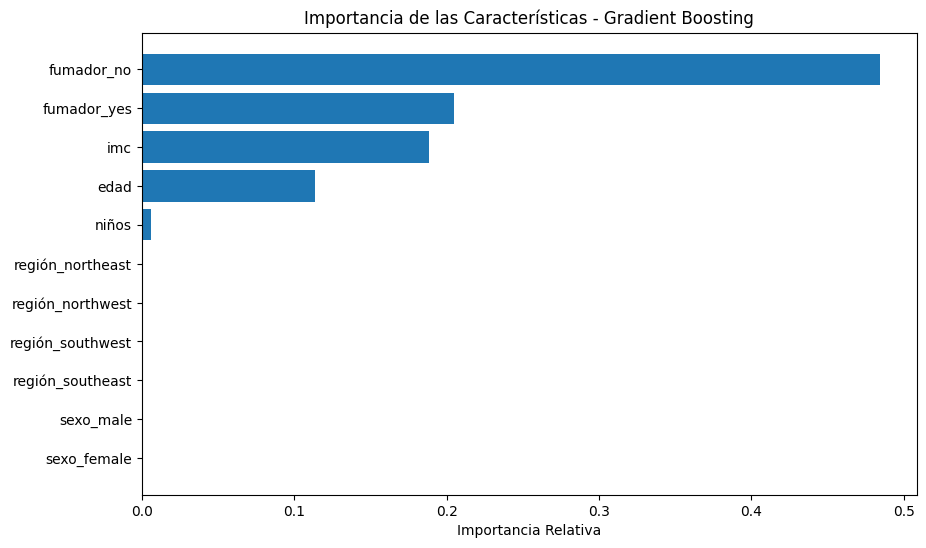

In [ ]:
# Obtenemos la importancia de las características del modelo de Gradient Boosting
importancia_caracteristicas = modelo_gradient_boosting.feature_importances_

# Ordenamos las características por importancia
indices = np.argsort(importancia_caracteristicas)

# Graficamos la importancia de las características
plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características - Gradient Boosting')
plt.barh(range(X_train_processed_df.shape[1]), importancia_caracteristicas[indices])
plt.yticks(range(X_train_processed_df.shape[1]), X_train_processed_df.columns[indices])
plt.xlabel('Importancia Relativa')
plt.show()


# Recomendaciones y conclusiones


Las características más importantes para predecir los costos médicos están relacionadas con el tabaquismo, el IMC y la edad. Las empresas pueden utilizar esta información para diseñar programas de prevención (como dejar de fumar y control del peso), ajustar primas de seguro, y ofrecer servicios médicos personalizados según la edad, lo que puede optimizar costos tanto para las empresas como para los pacientes.